## Name : Khushal Bisani

### House Price Prediction

Description : In this notebook visualize the relation between various features with sale price of house and also apple machine learning models for predicton on test data . Data is taken from the "Kaggle House Price Prediction" challenge.

### Load Data

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Import Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train,test]

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Data description text file
text = open("data_description.txt", "r")
text.readlines()

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

### Data visualization and cleaning

As I  go through above data_description , I think that these features highly determined by one who want buy a house with respect to saleprice.

"MSZoning" , "LotArea" , "Utilities" , "Condition1" , "Condition2",
"OverallQual" , "OverallCond" , "yearBuilt" , "ExterQual" == "ExterCond" , "BsmtQual" , "BsmtCond" , "TotalBsmtSF" , "GrLivArea" , "GarageCars" , "GarageArea"

1) MSZoning: Identifies the general zoning classification of the sale.
The boxplot of MSZoning with respect to SalesPrice does not show any linear relation . Reason is that here we have not classify on basis of area like which unit has large area as land is cheap that sector has high price than that sector where land is expensive but small in area. So , this feature does not directly show any relation with price.  

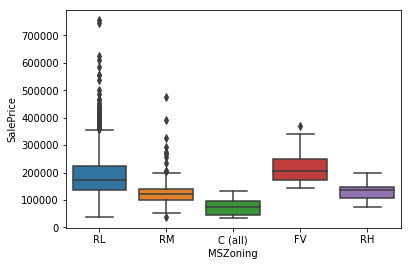

In [7]:
sns.boxplot(x=train.MSZoning,y=train.SalePrice)

2) LotArea: Lot size in square feet . Lot Area has too much outliar

Text(0,0.5,'SalePrice')

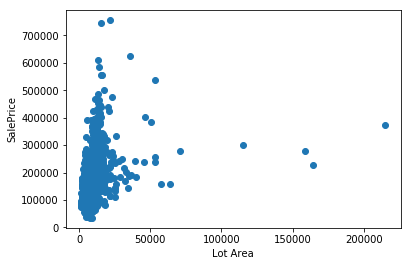

In [8]:
plt.scatter(train.LotArea , train.SalePrice)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")

3) Utilities , Condition1 and Condition2 are not showing any relation with Saleprice. In utilities a large domain of houses already alloted huge all facilities. 

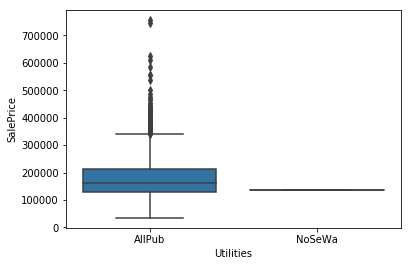

In [9]:
sns.boxplot(x = train.Utilities , y = train.SalePrice)

In [10]:
utilities_mapping = {"AllPub" : 4 , "NoSeWr" : 3 , "NoSeWa" : 2 , "ELO" : 1}

for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].map(utilities_mapping)
    dataset['Utilities'] = dataset['Utilities'].fillna(0)
    dataset['Utilities'] = dataset['Utilities'].astype(int)
    
train.Utilities.head()

0    4
1    4
2    4
3    4
4    4
Name: Utilities, dtype: int32

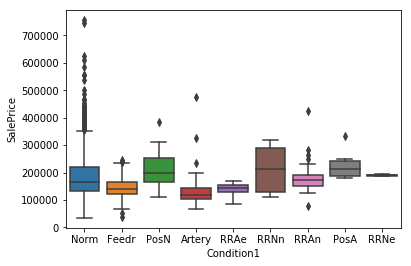

In [11]:
sns.boxplot(x=train.Condition1,y=train.SalePrice)

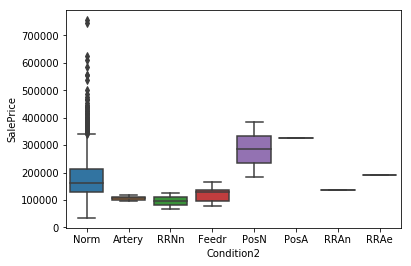

In [12]:
sns.boxplot(x=train.Condition2,y=train.SalePrice)

4) Overall quality of house is graded as 1-10 scale which show 1 for very poor and 10 for very excellent.
It show a very good relation with Saleprice as quality index increases , Saleprice also increases. It can be selected for modeling price prediction.

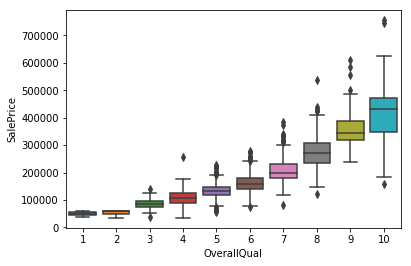

In [13]:
sns.boxplot(x=train.OverallQual,y=train.SalePrice)

5) Overall condition of house is graded as 1-10 scale which show 1 for very poor and 10 for very excellent.
It show a very good relation with Saleprice as condition index increases , Saleprice also increases. It can be selected for modeling price prediction. But it not a very good relation as shown by Overall Quality . We can consider that Overall Condition and Overall Quality point to same feature ie, if something is in good quality has good condition.

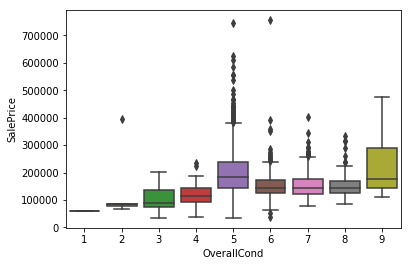

In [14]:
sns.boxplot(x = train.OverallCond ,y = train.SalePrice)

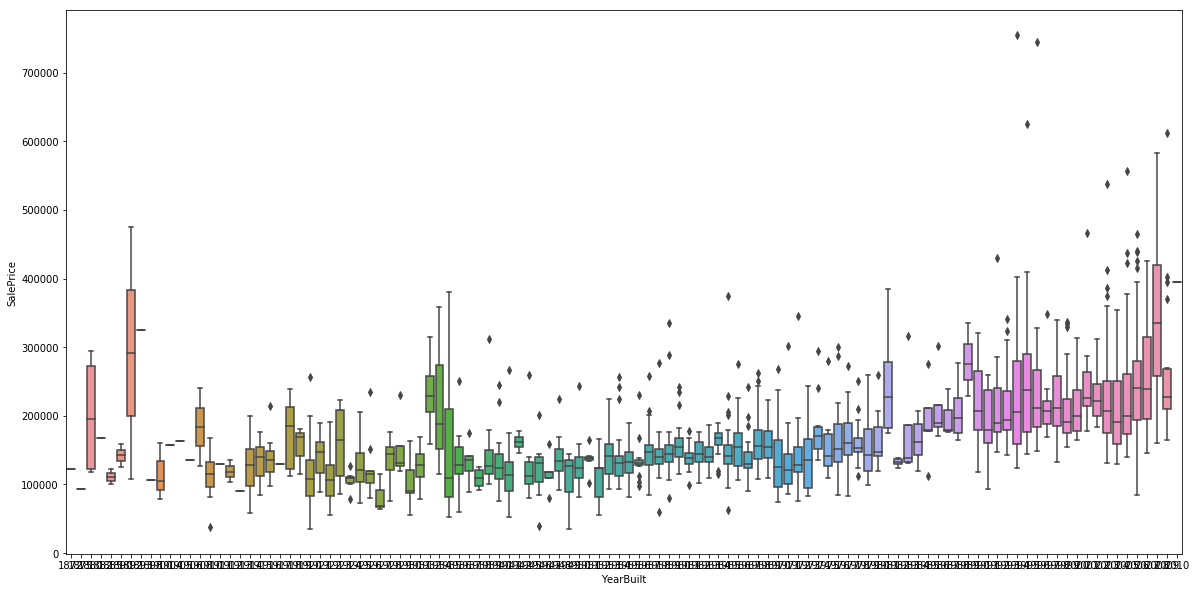

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(x = train.YearBuilt , y = train.SalePrice)

6) External Quality & Condition is showing good relation with saleprice.But to visualize this we have to label them in integer format by giving a proper scale as 1 for poor and 5 for excellent ie , 1-5 scale .

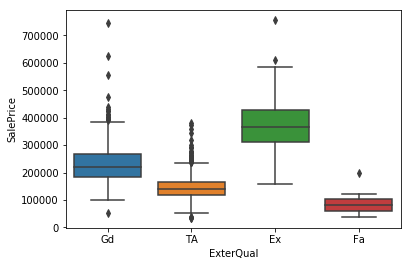

In [16]:
sns.boxplot(x = train["ExterQual"] , y = train["SalePrice"])

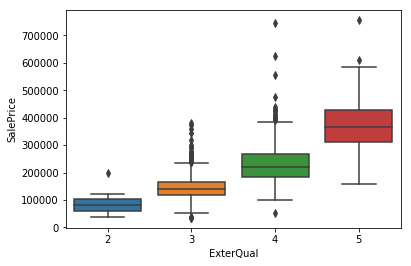

In [17]:
external_mapping = {"Ex" : 5 , "Gd" : 4 , "TA" : 3 , "Fa" : 2 , "Po" : 1}

for dataset in combine:
    dataset["ExterQual"] = dataset["ExterQual"].map(external_mapping)
    dataset["ExterQual"] = dataset["ExterQual"].fillna(0)
    dataset["ExterQual"] = dataset["ExterQual"].astype(int)

sns.boxplot(x = train["ExterQual"] , y = train["SalePrice"])

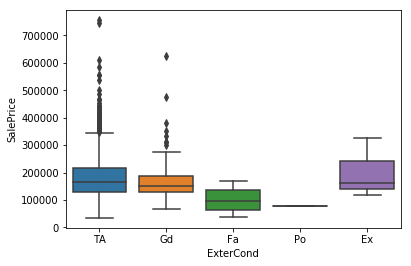

In [18]:
sns.boxplot(x = train["ExterCond"] , y = train["SalePrice"])

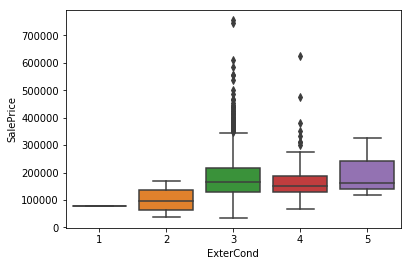

In [19]:
for dataset in combine:
    dataset["ExterCond"] = dataset["ExterCond"].map(external_mapping)
    dataset["ExterCond"] = dataset["ExterCond"].fillna(0)
    dataset["ExterCond"] = dataset["ExterCond"].astype(int)
    
sns.boxplot(x = train["ExterCond"] , y = train["SalePrice"])

7) Basement quality and condition is also scale from 1 to 6 such that 1 for no basement , 2 for poor and in the same way upto 6 scaling in which 6 for excellent.Basement quality determines salesprice in proper way like as inch wise basement size increases saleprice increases , Basement condition also show a good relation but it seems that it has few outliar cases so for now skip the condition case. 

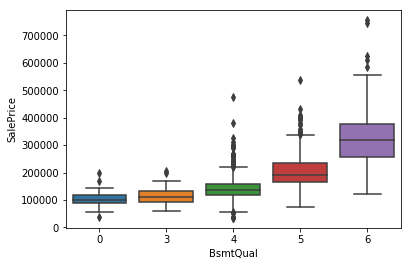

In [20]:
Bsmt_mapping = {"Ex" : 6 , "Gd" : 5 , "TA" : 4 , "Fa" : 3 , "Po" : 2 , "NA" : 1}

for dataset in combine:
    dataset["BsmtQual"] = dataset["BsmtQual"].map(Bsmt_mapping)
    dataset["BsmtQual"] = dataset["BsmtQual"].fillna(0)
    dataset["BsmtQual"] = dataset["BsmtQual"].astype(int)

sns.boxplot(x = train["BsmtQual"] , y = train["SalePrice"])

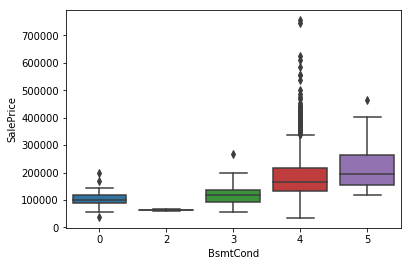

In [21]:
for dataset in combine:
    dataset["BsmtCond"] = dataset["BsmtCond"].map(Bsmt_mapping)
    dataset["BsmtCond"] = dataset["BsmtCond"].fillna(0)
    dataset["BsmtCond"] = dataset["BsmtCond"].astype(int)

sns.boxplot(x = train["BsmtCond"] , y = train["SalePrice"])

Text(0,0.5,'SalePrice')

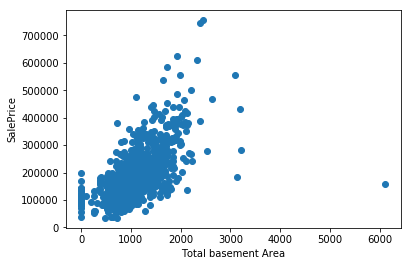

In [22]:
plt.scatter(train.TotalBsmtSF , train.SalePrice)
plt.xlabel("Total basement Area")
plt.ylabel("SalePrice")

Text(0,0.5,'Sale Price')

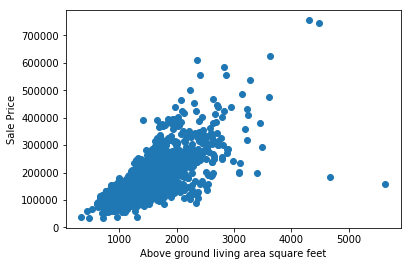

In [23]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel("Above ground living area square feet")
plt.ylabel("Sale Price")

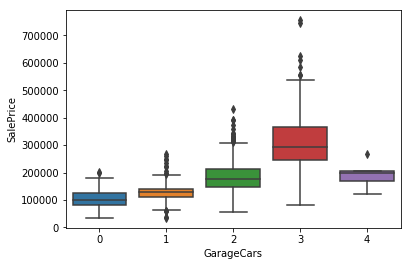

In [24]:
sns.boxplot(x = train["GarageCars"] , y = train["SalePrice"])

Text(0,0.5,'Sale Price')

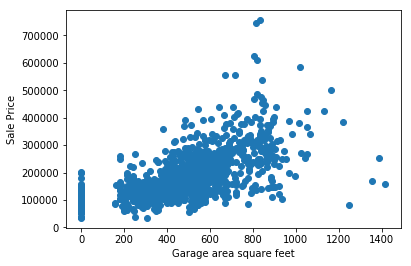

In [25]:
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel("Garage area square feet")
plt.ylabel("Sale Price")

### Handling Missing data

In [26]:
missing = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

miss_df = pd.concat([missing , percent] , axis = 1 , keys=['Missing', 'Percent'])
miss_df.head(20)

,Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [27]:
# drop all those features which has missing data greater than 1

train = train.drop((miss_df[miss_df['Missing']>1]).index , 1)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].dropna().mode())
train.isnull().sum().max()

1

In [28]:
test = test.drop((miss_df[miss_df['Missing']>1]).index , 1)
combine = [train , test]
test.isnull().sum().max()

4

### Quick review through correlation matrix

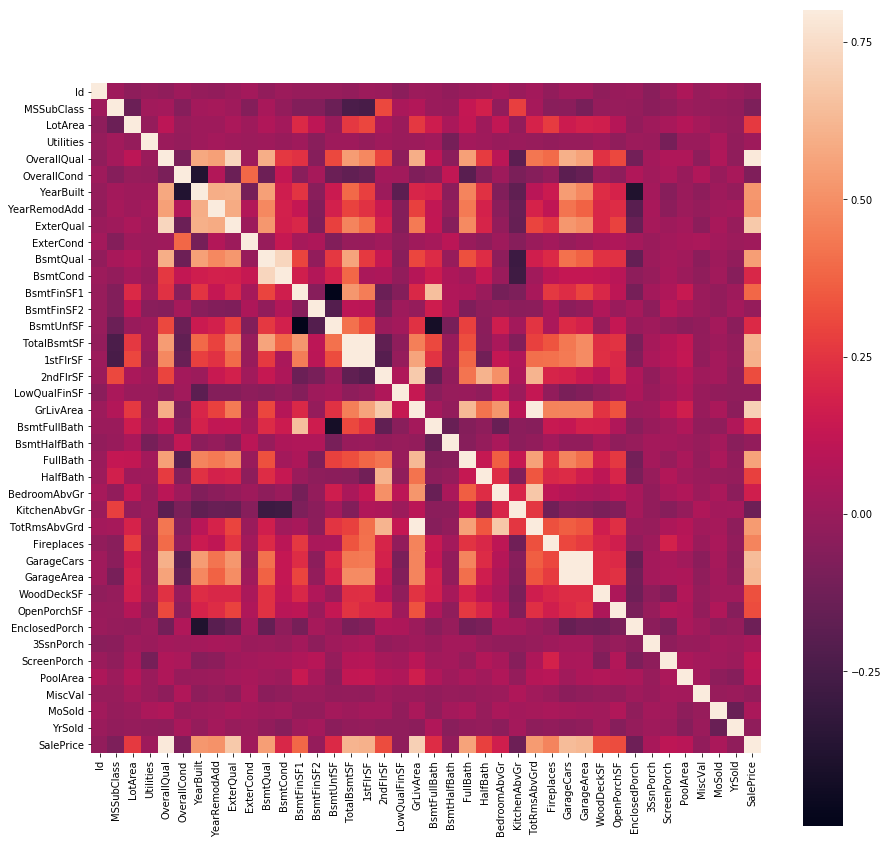

In [29]:
cormat = train.corr()
f , ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormat , vmax = .8 , square = True)

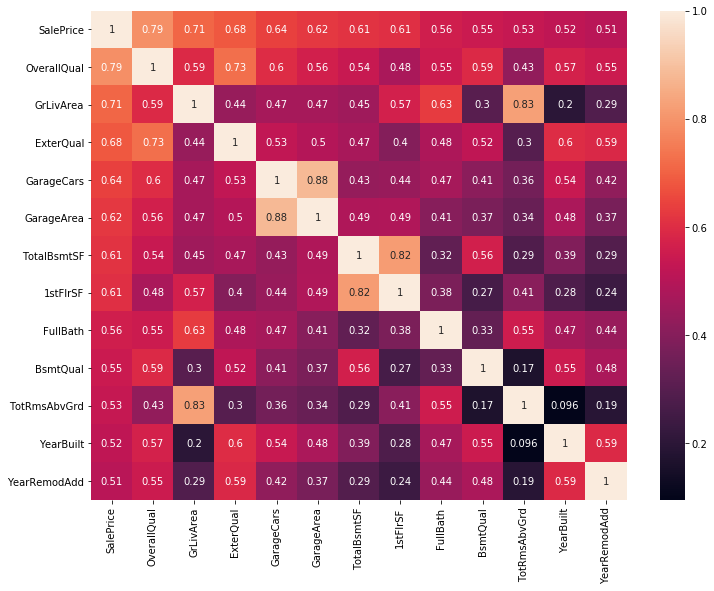

In [30]:
k = 13
plt.figure(figsize = (12,9))
cols = cormat.nlargest(k , 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm , annot = True , yticklabels = cols.values , xticklabels = cols.values)

In [31]:
train[['SalePrice' , 'OverallQual' , 'GrLivArea' , 'ExterQual' , 'GarageCars' , 'TotalBsmtSF']].describe()

,SalePrice,OverallQual,GrLivArea,ExterQual,GarageCars,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,3.39589,1.767123,1057.429452
std,79442.502883,1.382997,525.480383,0.57428,0.747315,438.705324
min,34900.000000,1.000000,334.000000,2.00000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,3.00000,1.000000,795.750000
50%,163000.000000,6.000000,1464.000000,3.00000,2.000000,991.500000
75%,214000.000000,7.000000,1776.750000,4.00000,2.000000,1298.250000
max,755000.000000,10.000000,5642.000000,5.00000,4.000000,6110.000000


In [32]:
test[[ 'OverallQual' , 'GrLivArea' , 'ExterQual' , 'GarageCars' , 'TotalBsmtSF']].describe()

,OverallQual,GrLivArea,ExterQual,GarageCars,TotalBsmtSF
count,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000
mean,6.078821,1486.045922,3.397533,1.766118,1046.117970
std,1.436812,485.566099,0.586444,0.775945,442.898624
min,1.000000,407.000000,2.000000,0.000000,0.000000
25%,5.000000,1117.500000,3.000000,1.000000,784.000000
50%,6.000000,1432.000000,3.000000,2.000000,988.000000
75%,7.000000,1721.000000,4.000000,2.000000,1305.000000
max,10.000000,5095.000000,5.000000,5.000000,5095.000000


In [33]:
car = train['GarageCars'].dropna().mode()[0]
area = train['TotalBsmtSF'].dropna().mean()
print(car,area)

2 1057.4294520547944


In [34]:
for dataset in combine:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(car)
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(area)

In [35]:
test[[ 'OverallQual' , 'GrLivArea' , 'ExterQual' , 'GarageCars' , 'TotalBsmtSF']].describe()

,OverallQual,GrLivArea,ExterQual,GarageCars,TotalBsmtSF
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,3.397533,1.766278,1046.125723
std,1.436812,485.566099,0.586444,0.775703,442.746811
min,1.000000,407.000000,2.000000,0.000000,0.000000
25%,5.000000,1117.500000,3.000000,1.000000,784.000000
50%,6.000000,1432.000000,3.000000,2.000000,988.000000
75%,7.000000,1721.000000,4.000000,2.000000,1304.000000
max,10.000000,5095.000000,5.000000,5.000000,5095.000000


Data is transformed in log form to generalise it

In [36]:
# SalePrice

C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


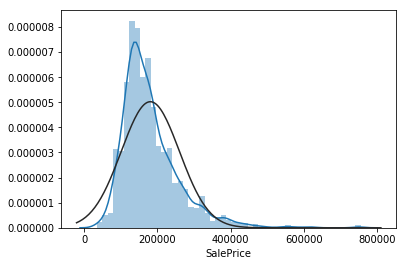

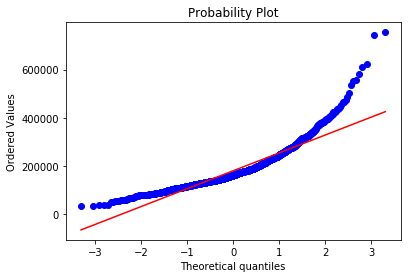

In [37]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [38]:
train['SalePrice'] = np.log(train['SalePrice'])

C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


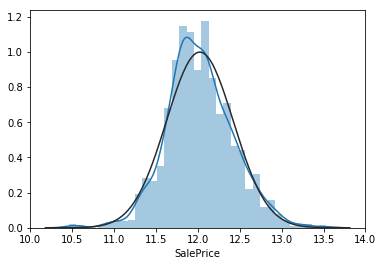

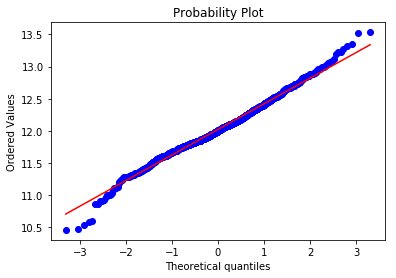

In [39]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [40]:
# GrLivArea

C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


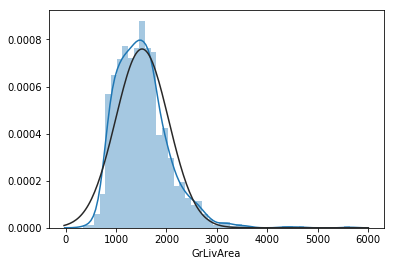

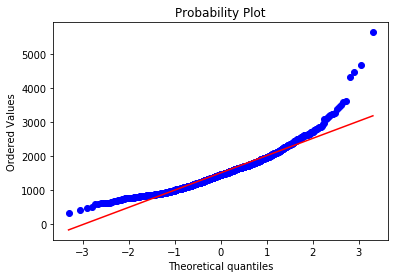

In [41]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [42]:
train['GrLivArea'] = np.log(train['GrLivArea'])
test['GrLivArea'] = np.log(test['GrLivArea'])
combine = [train ,test]

C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


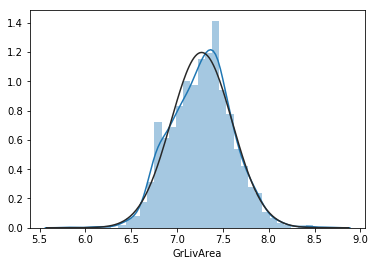

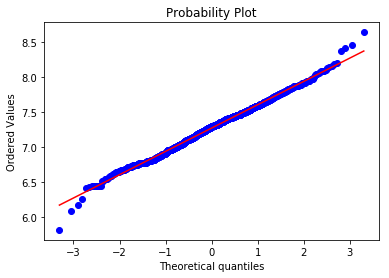

In [43]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [44]:
# TotalBsmtSF 
# log of zero not possible(deal it)

C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


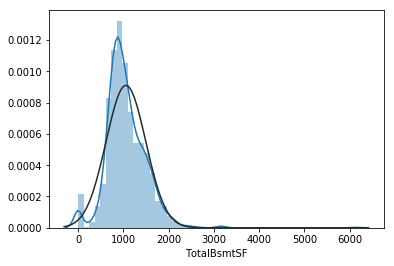

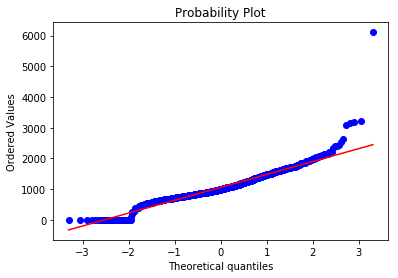

In [45]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [46]:

for dataset in combine:
    dataset['HasBsmt'] = pd.Series(len(dataset['TotalBsmtSF']), index=dataset.index)
    dataset['HasBsmt'] = 0 
    dataset.loc[dataset['TotalBsmtSF']>0,'HasBsmt'] = 1

In [47]:
for dataset in combine:
    dataset.loc[dataset['HasBsmt']==1,'TotalBsmtSF'] = np.log(dataset['TotalBsmtSF'])

C:\Users\khush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


C:\Users\khush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


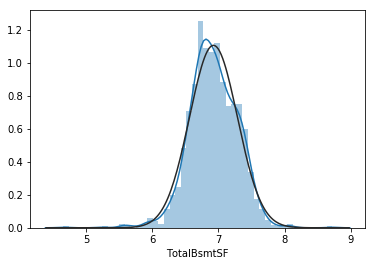

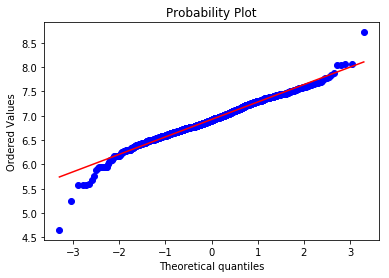

In [48]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### Prepare data

In [49]:
train = train[["SalePrice" , "Id" , "OverallQual","GrLivArea","ExterQual","GarageCars","TotalBsmtSF"]]
test = test[[ "Id" , "OverallQual","GrLivArea","ExterQual","GarageCars","TotalBsmtSF"]]

In [50]:
#convert categorical variable into dummy
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Model Implementation

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [52]:
train.head()

,SalePrice,Id,OverallQual,GrLivArea,ExterQual,GarageCars,TotalBsmtSF
0,12.247694,1,7,7.444249,4,2,6.752270
1,12.109011,2,6,7.140453,3,2,7.140453
2,12.317167,3,7,7.487734,4,2,6.824374
3,11.849398,4,7,7.448334,3,3,6.628041
4,12.429216,5,8,7.695303,4,3,7.043160


In [53]:
test.head()

,Id,OverallQual,GrLivArea,ExterQual,GarageCars,TotalBsmtSF
0,1461,5,6.797940,3,1.0,6.782192
1,1462,6,7.192182,3,1.0,7.192182
2,1463,5,7.395722,3,2.0,6.833032
3,1464,6,7.380256,3,2.0,6.830874
4,1465,8,7.154615,4,2.0,7.154615


In [54]:
train_x = train.drop(["SalePrice" , "Id"] , axis = 1)
train_y = train["SalePrice"]

test_x = test.drop("Id" , axis =1).copy()

In [55]:
reg = LinearRegression()
reg.fit(train_x  , train_y)
y_pred_reg = reg.predict(test_x)
acc_log_reg = round(reg.score(train_x , train_y) * 100 , 2)
acc_log_reg

80.38

In [56]:
svr = SVR()
svr.fit(train_x , train_y)
y_pred_svr = svr.predict(test_x)
acc_log_svr = round(svr.score(train_x , train_y) * 100 , 2)
acc_log_svr

85.19

In [58]:
submission = pd.DataFrame({
    'Id' : test['Id'] , 'SalePrice' : np.exp(y_pred_svr)  # log to antilog
})

submission.to_csv("test_result_submission.csv" , index = False)